https://leetcode.com/problems/word-ladder/description/   


End word need not to be in word list

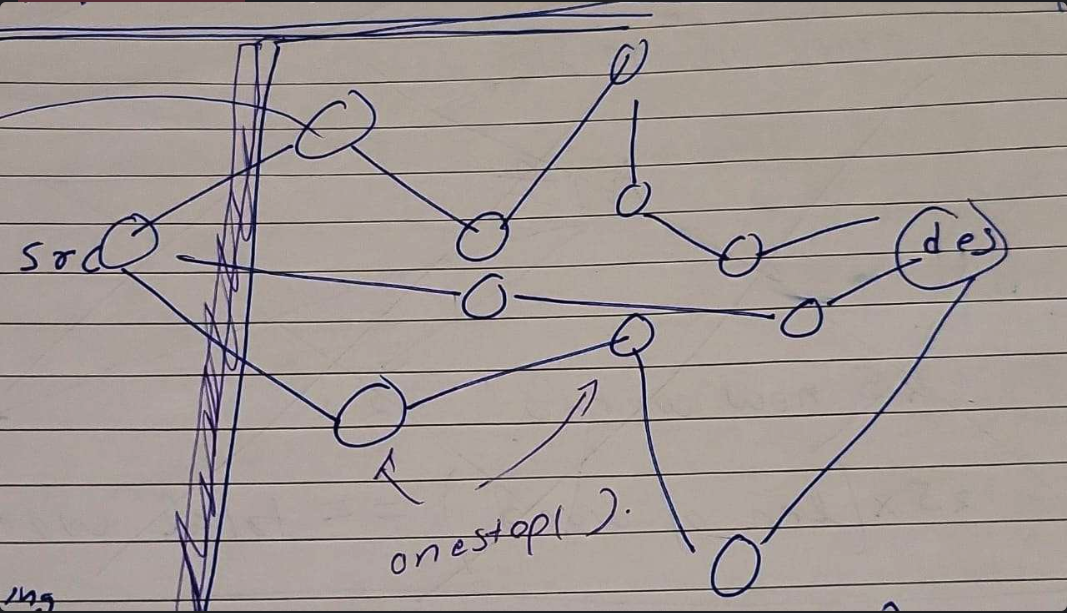

In [ ]:
class Solution {
public:
    int ladderLength(string beginWord, string endWord, vector<string>& wordList) {
        unordered_set<string> words(wordList.begin(),wordList.end());
        unordered_map<string,bool> visited;
        queue<pair<string,int>> q;
        if(!words.count(endWord)){
            return 0;
        } 
        visited[beginWord]=1;
        q.push({beginWord,0});
        while(q.size()){
            auto x=q.front();
            q.pop();
            string tmp=x.first;
            if(tmp==endWord){
                return x.second+1;
            } 
            for(int i=0;i<tmp.size();i++){
                char ch=tmp[i];
                for(int j=0;j<26;j++){
                    char rep=j+'a';
                    tmp[i]=rep;
                    if(words.count(tmp) and !visited[tmp]){
                        visited[tmp]=1;
                        q.push({tmp,x.second+1});
                    }
                }
                tmp[i]=ch;
            }
        }
        return 0;
    }
};
` 

https://leetcode.com/problems/word-ladder-ii/description/    
 return all the shortest transformation sequences from beginWord to endWord, or an empty list if no such sequence exists.

In [ ]:
void bfs(string &beginWord, string &endWord, unordered_set<string> &words, unordered_map<string,int> &levels){
    queue<pair<string,int>> q;
    unordered_map<string,bool> visited;
    visited[beginWord]=1;
    levels[beginWord]=0;
    q.push({beginWord,0});
    while(q.size()){
        auto p=q.front();
        q.pop();
        string tmp=p.first;
        if(tmp==endWord){
            return;
        } 
        for(int i=0;i<tmp.size();i++){
            char ch=tmp[i];
            for(int j=0;j<26;j++){
                char rep=j+'a';
                tmp[i]=rep;
                if(words.count(tmp) and !visited[tmp]){
                    visited[tmp]=1;
                    q.push({tmp,p.second+1});
                    levels[tmp]=p.second+1;
                }
            }
            tmp[i]=ch;
        }
    }
}

void backtrack(string &word,string &beginWord, vector<vector<string>> &ans, vector<string> &tmp, unordered_map<string,int> &levels){
    if(word==beginWord){
        reverse(tmp.begin(),tmp.end());
        ans.push_back(tmp);
        reverse(tmp.begin(),tmp.end());
        return;
    }

    int currLevel=levels[word];
    for(int i=0;i<word.size();i++){
        char ch=word[i];
        for(int j=0;j<26;j++){
            char rep=j+'a';
            word[i]=rep;
            if(levels.count(word) and currLevel==1+levels[word]){
                tmp.push_back(word);
                backtrack(word,beginWord,ans,tmp,levels);
                tmp.pop_back();
            }
        }
        word[i]=ch;
    }
}

vector<vector<string>> findLadders(string beginWord, string endWord, vector<string>& wordList) {
    unordered_set<string> words(wordList.begin(),wordList.end());
    if(!words.count(endWord)){
        return {};
    } 

    unordered_map<string,int> levels;
    bfs(beginWord,endWord,words,levels);

    if(!levels.count(endWord)){
        return {};
    } 

    vector<vector<string>> ans;
    vector<string> tmp;
    tmp.push_back(endWord);
    backtrack(endWord,beginWord,ans,tmp,levels);
    return ans;
}

shortest prime path   
https://www.geeksforgeeks.org/problems/shortest-prime-path--141631/1

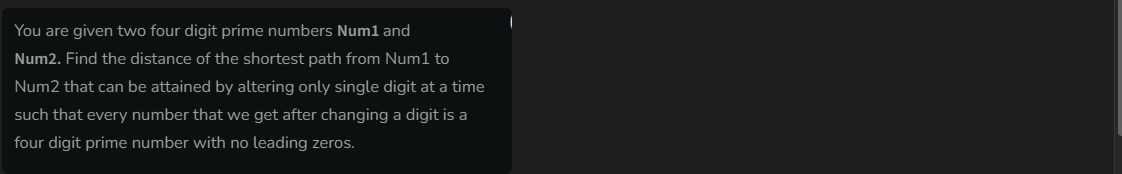

In [ ]:
unordered_map<string,bool> primes_generate(ll n){
    unordered_map<string,bool> m;
    vector<ll> p(n+1,1); 
    p[0]=p[1]=0; 
    for(long long i=2;i<=n;i++){ 
        if(p[i]){
            m[to_string(i)];
            for(long long j=i;i*j<=n;j++){ 
                p[i*j]=0; 
            }       
        } 
    }
    return m;
}

int solve(int src,int de){
//more efficient will be using concpet of segmented sieve 1000 to 9999
    unordered_map<string,bool> primes= primes_generate(9999);
    unordered_map<string,bool> visited;
    visited[to_string(src)]=1;
    const int LEN_OF_NUM=4;
    queue<pair<string,int>> q;  
    q.push({to_string(src),0});
    while(q.size()){
        auto x=q.front();
        q.pop();  
        string tmp=x.first;  
        if(tmp==to_string(de)){
            return x.second;          
        } 
        for(int i=0;i<LEN_OF_NUM;i++){
          char c=tmp[i];
          for(int j=0;j<=9;j++){
              if(i==0 and j==0){
                continue;
              } 
              tmp[i]='0'+j;
              if(primes.count(tmp) and !visited.count(tmp)){
                    visited[tmp];
                    q.push({tmp,x.second+1});              
              }
          }
          tmp[i]=c;
        }
    }
return -1;
}

# Lock Family

https://leetcode.com/problems/open-the-lock/description/

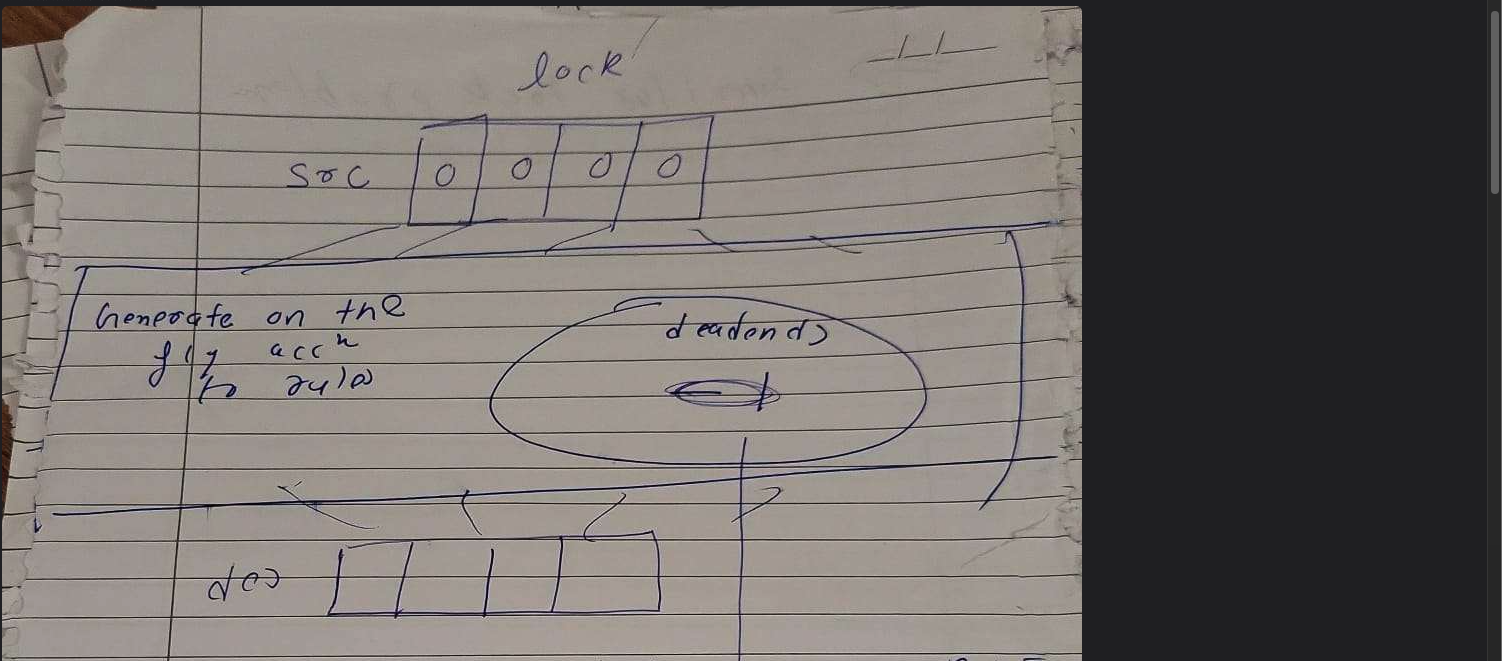

In [ ]:
class Solution {
    public:
    
        vector<string> getNeighbors(string &s){
            vector<string> neighbors;
            for(int i=0;i<s.size();i++){
                char ch=s[i];
                int digit=s[i]-'0';
                char rep1=(digit+1)%10 +'0';
                char rep2=(digit-1+10)%10 + '0';
                s[i]=rep1;
                neighbors.push_back(s);
                s[i]=rep2;
                neighbors.push_back(s);
                s[i]=ch;
            }
    
            return neighbors;
        }
    
        int openLock(vector<string>& vos, string k) {
            //will kind of act as a visited set
            unordered_set<string> se(vos.begin(),vos.end());
            string src="0000";
            if(se.count(src) or se.count(k)){
                return -1;
            } 
            queue<pair<string,int>> q;
            q.push({src,0});
            while(q.size()){
                string tmp=q.front().first;
                int steps=q.front().second;
                q.pop();
                if(tmp==k){
                    return steps;
                } 
                vector<string> neighbors=getNeighbors(tmp);
                for(int i=0;i<neighbors.size();i++){
                    if(se.count(neighbors[i])){
                        continue;
                    } 
                    se.insert(neighbors[i]);
                    q.push({neighbors[i],steps+1});
                }
            }
            return -1;
    
        }
    };